In [2]:
import Pkg; 
Pkg.add("Cbc")
Pkg.add("GraphRecipes")
Pkg.add("LightGraphs")
Pkg.add("SimpleWeightedGraphs")
Pkg.add("SparseArrays")
Pkg.add("CSV")
Pkg.add("DataFrames")

using Pkg, JuMP, Plots, Cbc, GraphRecipes, LightGraphs, SimpleWeightedGraphs, SparseArrays

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
   Installed AxisAlgorithms ─── v1.0.1
   Installed Ratios ─────────── v0.4.3
   Installed NetworkLayout ──── v0.4.4
   Installed AbstractTrees ──── v0.3.4
   Installed GraphRecipes ───── v0.5.9
   Installed OffsetArrays ───── v1.10.8
   Installed GeometryTypes ──── v0.8.5
   Installed WoodburyMatrices ─ v0.5.5
   Installed Interpolations ─── v0.13.6
    Updating `~/.julia/environments/v1.7/Project.toml`
  [bd48cda9] + GraphRecipes v0.5.9
    Updating `~/.julia/environments/v1.7/Manifest.toml`
  [1520ce14] + AbstractTrees v0.3.4
  [13072b0f] + AxisAlgorithms v1.0.1
  [4d00f742] + GeometryTypes v0.8.5
  [bd48cda9] + GraphRecipes v0.5.9
  [a98d9a8b] + Interpolations v0.13.6
  [46757867] + NetworkLayout v0.4.4
  [6fe1bfb0] + OffsetArrays v1.10.8
  [c84ed2f1] + Ratios v0.4.3
  [efce3f68] + WoodburyMatrices v0.

  ✓ Libmount_jll
  ✓ SCS_GPU_jll
  ✓ Bzip2_jll
  ✓ libsodium_jll
  ✓ METIS_jll
  ✓ ColorSchemes
  ✓ OpenBLAS32_jll
  ✓ Xorg_libXau_jll
  ✓ libpng_jll
  ✓ libfdk_aac_jll
  ✓ ASL_jll
  ✓ GLPK_jll
  ✓ LAME_jll
  ✓ Pixman_jll
  ✓ protoc_jll
  ✓ LERC_jll
  ✓ EarCut_jll
  ✓ SCS_jll
  ✓ JpegTurbo_jll
  ✓ Xorg_libXdmcp_jll
  ✓ Ogg_jll
  ✓ PrettyTables
  ✓ x265_jll
  ✓ x264_jll
  ✓ Zstd_jll
  ✓ Expat_jll
  ✓ LZO_jll
  ✓ Opus_jll
  ✓ Xorg_xtrans_jll
  ✓ ECOS_jll
  ✓ Libiconv_jll
  ✓ PCRE_jll
  ✓ Libffi_jll
  ✓ Libgpg_error_jll
  ✓ Wayland_protocols_jll
  ✓ Xorg_libpthread_stubs_jll
  ✓ Libuuid_jll
  ✓ FriBidi_jll
  ✓ OpenSpecFun_jll
  ✓ WebSockets
  ✓ DiffResults
  ✓ Contour
  ✓ ArnoldiMethod
  ✓ StructArrays
  ✓ CoordinateTransformations
  ✓ SortingAlgorithms
  ✓ GeometryTypes
  ✓ NamedArrays
  ✓ ChangesOfVariables
  ✓ CodecBzip2
  ✓ CSV
  ✓ FreeType2_jll
  ✓ ZeroMQ_jll
  ✓ IntervalArithmetic
  ✓ CoinUtils_jll
  ✓ MUMPS_seq_jll
  ✓ libvorbis_jll
  ✓ Interpolations
  ✓ Libtiff_jll
  ✓ ProtoBuf
 

┌ Info: Skipping precompilation since __precompile__(false). Importing GeometryTypes [4d00f742-c7ba-57c2-abde-4428a4b178cb].
└ @ Base loading.jl:1124
┌ Info: Precompiling Interpolations [a98d9a8b-a2ab-59e6-89dd-64a1c18fca59]
└ @ Base loading.jl:1423
┌ Warning: Module StaticArrays with build ID 791722028364589 is missing from the cache.
│ This may mean StaticArrays [90137ffa-7385-5640-81b9-e52037218182] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Info: Skipping precompilation since __precompile__(false). Importing Interpolations [a98d9a8b-a2ab-59e6-89dd-64a1c18fca59].
└ @ Base loading.jl:1124
┌ Info: Precompiling LightGraphs [093fc24a-ae57-5d10-9952-331d41423f4d]
└ @ Base loading.jl:1423
┌ Warning: Module ArnoldiMethod with build ID 624161931303303 is missing from the cache.
│ This may mean ArnoldiMethod [ec485272-7323-5ecc-a04f-4719b315124d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1

### ECE/CS/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2022 ###


# Madison Bus Route Designing: Preliminary Report

Team Members: Rabeeya Hamid, Ai Guan, Naman Gupta

Data: 04/22/2022

*****

### Table of Contents

1. [Problem Description](#1.-Problem-Description)
2. [Data Collection](#2.-Data-Collection)
3. [Mathematical Model](#3.-Mathematical-Model)
4. [Preliminary Code Implementation](#4.-Code-Implementation)
5. [Preliminary Results and Analysis](#5.-Results-and-Analysis)


## 1. Problem Description


Based on the increasing need of public transportation, the City of Madison Metro Transit is proposing a major network redesign ([Transit Network Redesign](https://www.cityofmadison.com/metro/routes-schedules/transit-network-redesign)). Currently, they are surveying the students of UW-Madison and the residents of Madison for suggestions on their travel preferences, so that they can design the route system to better meet user demand and business. As University of Wisconsin-Madison students, our team thinks the redesign project would also have significant impact on our daily lives. 

The aim of the project is to model the routing design as a network optimization problem, so that we can propose the model as a part of their feedback survey. The family of network optimization problem includes assignment, critical path, max flow, shortest path, transportation, and min-cost flow problems . One of the primary results of the model is a network of arcs and nodes that illustrate the optimal routing among the points ([Network Optimization](http://home.ubalt.edu/ntsbarsh/opre640a/partIII.htm#:~:text=The%20family%20of%20network%20optimization,called%20a%20vertex%2C%20or%20point)).

The project is a transportation problem in the network optimization problem family, and the nodes represent the bus stations, and the arcs represent the transportation flow between two stations. The model consist of three parts: decision variables, constraints, and objective function. We would like to model the optimal routes to meet the demand of ridership for each bus stop in Madison. Therefore, the objective function of the problem to maximizing the number of passengers boarding for each bus with potential constraints including fuel limitation, bus capacity, routing regulations and bus station demand. 

## 2. Data Collection

The data utilized in the project is the publicly available data from the City of Madison website. Two datasets are selected corresponding to the 
   1.	Metro Transit Ridership by Stop | City of Madison Open Data.  [Data Source](https://data-cityofmadison.opendata.arcgis.com/datasets/cityofmadison::metro-transit-ridership-by-stop)
   2.	Metro Transit Bus Route Patterns | City of Madison Open Data. [Data Source](https://data-cityofmadison.opendata.arcgis.com/datasets/cityofmadison::metro-transit-bus-route-patterns/about)
    
The first dataset contains a list of all bus stops, their position geographically (longitude and latitude) and the ridership at that bus stop averaged over 12 days. We do not have distances between these bus stops, nor do we have connections between them, for which we propose the following approach. 
   *   We calculate the Manhattan distance between the geographic position of the bus stops to define the distances between them. 
   *   These distances will be multiplied by a constant of proportionality to determine the fuel cost associated with each 
        path. 
The second dataset contains a list of present bus routes, the bus stops along the routes and the total ridership for the bus routes averaged over 12 days. 
	
For the preliminary report, the focus is to generate the illustrative demo of the model. It is a smaller bus network which consists of 8 bus stations.

In [5]:
# Add packages
using Pkg


using CSV
using DataFrames

# import data set as a dataframe
ridership_data = CSV.read("data/Metro_Transit_Ridership_by_Stop.csv", DataFrame)
route_patterns_data = CSV.read("data/Metro_Transit_Bus_Route_Patterns.csv", DataFrame)
stops_data = CSV.read("data/Metro_Transit_Bus_Stops.csv", DataFrame);

In [6]:
first(ridership_data, 5)

5×17 DataFrame
 Row │ X         Y        OBJECTID  StopID  StopDescription          Lat       ⋯
     │ Float64   Float64  Int64     Int64   String                   Float64   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ -89.407   43.0711     10799       5  Dayton fs Orchard        43.0711   ⋯
   2 │ -89.4002  43.0759     10800      10  Langdon ns Park          43.0759
   3 │ -89.397   43.0758     10801      25  EB Langdon fs Lake       43.0758
   4 │ -89.3973  43.0718     10802      39  Lake ns Johnson          43.0718
   5 │ -89.3901  43.0784     10803      45  EB Langdon ns Wisconsin  43.0784   ⋯
                                                              11 columns omitted

In [7]:
first(route_patterns_data, 5)

5×22 DataFrame
 Row │ OBJECTID  PointsToLine_shape_id  PointsToLine_shape_id2  trips_routes_r ⋯
     │ Int64     Int64                  Int64                   Int64          ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     3336                  59757                   59757                 ⋯
   2 │     3337                  59758                   59758
   3 │     3338                  59759                   59759
   4 │     3339                  59761                   59761
   5 │     3340                  59763                   59763                 ⋯
                                                              19 columns omitted

In [8]:
first(stops_data, 5)

5×27 DataFrame
 Row │ X         Y        OBJECTID  stop_id  stop_code  stop_name              ⋯
     │ Float64   Float64  Int64     Int64    String7    String                 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ -89.3439  43.0907     28238     1191  1191       Oakridge & Miller (EB) ⋯
   2 │ -89.3414  43.0909     28239     1386  1386       Oakridge & Maple (WB)
   3 │ -89.3471  43.0905     28240     1457  1457       Oakridge & Evergreen (
   4 │ -89.3435  43.0909     28241     1484  1484       Oakridge & Miller (WB)
   5 │ -89.3407  43.0908     28242     1519  1519       Oakridge & Maple (EB)  ⋯
                                                              22 columns omitted

In [9]:
N = size(ridership_data,1)

2142

In [10]:
import Pkg; Pkg.add("Geodesy")
using Geodesy

stops = Vector{LatLon{Float64}}()

for i in eachrow(ridership_data)
    x = LatLon(i.Lat, i.Lon)
    push!(stops, x)
end

distances = zeros(N,N)

for i in 1:N
    for j in 1:N
        distances[i,j] = euclidean_distance(stops[i], stops[j])
    end
end


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
┌ Info: Precompiling Geodesy [0ef565a4-170c-5f04-8de2-149903a85f3d]
└ @ Base loading.jl:1423
┌ Warning: Module StaticArrays with build ID 791722028364589 is missing from the cache.
│ This may mean StaticArrays [90137ffa-7385-5640-81b9-e52037218182] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Warning: Module StaticArrays with build ID 791722028364589 is missing from the cache.
│ This may mean StaticArrays [90137ffa-7385-5640-81b9-e52037218182] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Info: Skipping precompilation since __precompile__(false). Importing Geodesy [0ef565a4-170c-5f04-8de2-149903a85f3d].
└ @ Base loading.jl:1124
┌ Info: Precompiling CoordinateTransformations [150eb455-5306-5404-9cee-2592286d6298]
└ @ Base loading.jl:142

In [11]:
distances

2142×2142 Matrix{Float64}:
     0.0      770.656    974.321   …  9116.76   11031.0     9974.57
   770.656      0.0      263.84       8351.56   10264.0     9210.79
   974.321    263.84       0.0        8145.92   10062.1     9002.55
   794.924    510.88     447.575      8449.38   10371.2     9299.83
  1602.09     872.171    630.145      7529.52    9448.51    8383.84
   611.097   1026.19    1287.46    …  9260.55   11159.1    10125.3
   939.284    239.555     35.5769     8181.38   10097.7     9037.96
   412.952    745.492    845.271      8945.64   10866.5     9797.28
   567.934    439.384    703.178      8694.74   10599.6     9557.52
   593.444    290.538    554.285      8587.94   10495.9     9449.46
   317.611    779.899    908.545   …  9030.56   10950.4     9883.46
   618.466    560.763    823.197      8754.44   10655.7     9618.47
   606.094    275.601    539.429      8571.96   10480.0     9433.44
     ⋮                             ⋱                ⋮      
 12189.1    11418.5    11231.5

In [12]:
stop_route = Dict()

for i in eachrow(stops_data)
    if i.Route != "None"
        stop_route[i.stop_id] = i.Route
    end
end

stop_route

Dict{Any, Any} with 1744 entries:
  9167 => "30"
  7144 => "16, 31, 38"
  9140 => "36"
  8690 => "55"
  4522 => "49"
  4838 => "75"
  7538 => "39"
  1812 => "5, 28"
  1199 => "6, 15"
  5143 => "21"
  7272 => "38"
  8363 => "51"
  7766 => "32"
  1704 => "5, 28"
  4876 => "18, 40"
  9675 => "20"
  2398 => "8, 38, 78"
  6785 => "70, 78"
  1823 => "4, 7, 38"
  6652 => "72"
  694  => "44"
  4623 => "75"
  692  => "2, 28, 48"
  2119 => "7"
  6430 => "68, 73"
  ⋮    => ⋮

## 3. Mathematical Model

### Parameters Given:
- Number of bus stops ```n``` : number of nodes in our network
- Adjacency Matrix ```Adj``` ($n \times n$) : describes connections between bus stops
- Distance Matrix ```D``` ($n \times n$): Euclidean distances between all bus stops
- Ridership vector ```r```($n \times 1$): the ridership demand at every bus stop
- Start node ```n_i```: the bus stop from where our bus starts
- End node ```n_e```: the bus stop where our bus route ends
- Distance (Fuel) limit ```f```: the distance our bus can travel in total

In [13]:
n = 8

Adj = [0 1 0 0 1 0 1 0;
       0 0 1 0 1 1 0 0;
       1 1 0 1 0 1 1 0;
       0 0 0 0 1 0 0 1;
       1 1 1 0 0 1 1 0;
       0 0 0 1 0 0 0 1;
       1 1 1 0 1 0 0 1;
       1 0 1 1 0 0 1 0;]

D = [0 4 6 3 10 1 8 10;
     5 0 2 6 5 5 4 6;
     1 8 0 4 2 7 2 3;
     7 2 3 0 4 2 8 9;
     2 3 9 4 0 5 1 2;
     1 4 1 3 10 0 8 8;
     5 8 2 6 5 2 0 6;
     1 8 7 4 2 1 2 0]

r = [4, 1, 8, 2, 9, 10, 5, 8]

n_i = 2
n_e = 7

f = 20
;

### Plotting network:

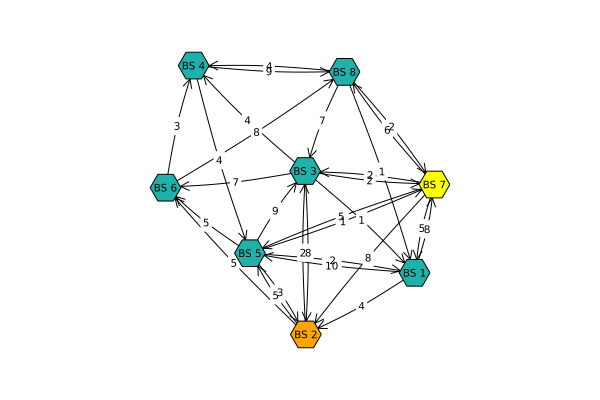

┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1423
┌ Warning: Module JLLWrappers with build ID 791694643491728 is missing from the cache.
│ This may mean JLLWrappers [692b3bcd-3c85-4b1f-b108-f13ce0eb3210] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Info: Skipping precompilation since __precompile__(false). Importing GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9].
└ @ Base loading.jl:1124
┌ Info: Precompiling GLFW_jll [0656b61e-2033-5cc2-a64a-77c0f6c09b89]
└ @ Base loading.jl:1423
┌ Warning: Module JLLWrappers with build ID 791694643491728 is missing from the cache.
│ This may mean JLLWrappers [692b3bcd-3c85-4b1f-b108-f13ce0eb3210] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Info: Skipping precompilation since __precompile__(false). Importing GLFW_jll [0656b61e-2033-5cc2-a64a-77c0f6c09b89].
└ @ Base loading.jl:1124
┌ Info: Precompiling JpegT

In [14]:
edgelabel_dict = Dict()
for i in 1:n
    for j in 1:n
        edgelabel_dict[(i, j)] = D[i, j]
    end
end

membership = [1,2,1,1,1,1,3,1]
nodecolor = [colorant"lightseagreen", colorant"orange", colorant"yellow"]
# membership color
nodefillc = nodecolor[membership]

graph = graphplot(Adj, names="BS ".*string.(1:n), curvature_scalar=0.01, edgelabel=edgelabel_dict, markercolor=nodefillc)

_Orange: Start node <br>
Yellow: End node_

### Parameters Calculated:
- Number of paths ```e```: number of edges in our network 
- Incidence matrix ```Inc```($n \times e$): describes the edges in our network.
- Edge costs ```d_e```($e \times 1$): the distance corresponding to edges in the network
- Rider intake ```r_e```($e \times 1$): the riders taken up after traveling to each edge
- Flow vector ```b``` ($n \times 1$): includes the start and end node

### Function for incidence matrix:
Defining function to calculate incidence matrix from adjacency matrix, taken from: https://github.com/sbromberger/LightGraphs.jl/issues/1489

In [15]:
function my_incidence_matrix(G)
    I = vcat([src(e) for e in edges(G)], [dst(e) for e in edges(G)])
    J = vcat(collect(1:ne(G)), collect(1:ne(G)))
    V = vcat(fill(-1, ne(G)), fill(1, ne(G)))
    return sparse(I, J, V)
end
;

### Calculating incidence matrix and number of edges:

In [16]:
dirGraph = LightGraphs.DiGraph(Adj) # converting adjacency matrix into a directed graph

Inc = Array(my_incidence_matrix(dirGraph)) # converting directed graph to an incidence matrix

e = size(Inc)[2] # number of edges
;

### Defining edge costs, rider intake, and flow vector:

In [17]:
temp_D = D.*Adj
temp_r = zeros((n,n))

for i = 1:n
        temp_r[i, :] = r.*Adj[i, :]
end

d_e = zeros(0)
r_e = zeros(0)

for i = 1:n
    for j = 1:n
        if temp_D[i, j] != 0
            append!(d_e, temp_D[i, j])
        end
        if temp_r[i, j] != 0
            append!(r_e, temp_r[i, j])
        end
    end    
end

b = zeros(n)
b[n_i] = -1
b[n_e] = 1
;


**Decision variable:** <br>

$x$: all possible edges in the network, length = $e$ <br>
    $$ x =   \left\{
\begin{array}{ll}
      1 & \text{If the bus travels on that edge}  \\
      0 & \text{If the bus doesn NOT travel on that edge} \\
\end{array} 
\right.  $$

**Objective function:** <br>
$$ \max_{x} \text{    }r_e \cdot x$$

**Constraints:** <br>
  s.t. 
$$ \text{Inc}*x = b, $$
$$ d_e \cdot x <= f  $$


## 4. Code Implementation

In [18]:
bus_route = Model(with_optimizer(Cbc.Optimizer))

@variable(bus_route, x[1:e], Bin) # binary decision variable x that maps out the [ath]
@constraint(bus_route, Inc*x .== b) # nodal conservation
@constraint(bus_route, dot(d_e, x) <= f) # fuel constraint

@objective(bus_route, Max, dot(r_e, x))  # maximize people getting on the bus
    
optimize!(bus_route) 

LoadError: UndefVarError: dot not defined

## 5. Results and Analysis

### Defining dictionary for converting edge index to path:

In [19]:
edgeIndex2path = Dict()
count = 1
for i = 1:n
    for j = 1:n
        if Adj[i, j] != 0
            edgeIndex2path[count] = (i, j)
            count = count + 1
        end
    end
end

### Finding the optimal path taken:

In [20]:
opt_path = value.(x)

# finding edges travelled using edgeIndex2path dictionary
path_taken_x = zeros(0)
path_taken_y = zeros(0)
for i = 1:e
    if opt_path[i] != 0
        temp = edgeIndex2path[i]
        append!(path_taken_x, temp[1] )
        append!(path_taken_y, temp[2] )
    end
end

# defining dictionary with 1 for travelled edges, 0 for untravelled edges
travelled_edges_dict = Dict()
for k = 1:length(path_taken_x)
    for i in 1:n
        for j in 1:n
            if i == path_taken_x[k] && j == path_taken_y[k] 
                travelled_edges_dict[(i, j)] = 1
            elseif haskey(travelled_edges_dict, (i, j))
                if travelled_edges_dict[(i, j)] == 1
                    travelled_edges_dict[(i, j)] = 1
                end
            else 
                travelled_edges_dict[(i, j)] = 0
            end
        end
    end
end

# printing the edges travelled on

print("The bus travelled on these edges: \n")
for i = 1:n
    for j = 1:n
        if travelled_edges_dict[(i, j)] != 0
            println((i, j))
        end
    end
end

LoadError: OptimizeNotCalled()

### Finding nodes travelled:

In [21]:
nodes = 1:n

temp_path = zeros((n,n))

# defining temporary variable temp_path to store nodes travelled to for on each edge index
# (zeros need to be filtered out) 
for i = 1:n
        temp_path[i, :] = nodes.*Adj[i, :]
end

path = zeros(0)

# filtering out zeros
for i = 1:n
    for j = 1:n
        if temp_path[i, j] != 0
            append!(path, temp_path[i, j])
        end
    end    
end


# finding actual nodes travelled to using optimal edge vector x
temp_path = path.*opt_path

path = zeros(0)

# filtering out zeros again
for p in temp_path
    if p != 0
        append!(path, p)
    end
end

# defining membership based on nodes travelled to, 1 for not travelled to, 2 for travelled to
membership = ones(n)
for i = 1:n
    for p in path 
        if p == i
            membership[i] = 2
        end
    end
end

# start node is also travelled to 
membership[n_i] = 2

# convert to int for indexing
for i = 1:n
    membership[i] = convert(Int, membership[i])
end

# assigning colours, yellow for travelled to, seagreen for not
int_membership = Int.(membership)
nodecolor = [colorant"lightseagreen", colorant"orange", colorant"yellow"]
nodefillc = nodecolor[int_membership]
;

LoadError: UndefVarError: opt_path not defined

### Plotting final network:
Yellow bus stops: are included in route
Seagreen bus stops: are NOT included in route
Paths with 1: are included in route
Paths with 0: are NOT included in route

In [22]:
# edges are 1 for travelled on, 0 for not travelled on
graph = graphplot(Adj, names="BS ".*string.(1:n), curvature_scalar=0.11, edgelabel=travelled_edges_dict, markercolor=nodefillc)


LoadError: UndefVarError: travelled_edges_dict not defined

### Fuel used, and people picked up:

In [23]:
println("Fuel used: ", dot(d_e, opt_path))
println("People picked up: ", dot(r_e, opt_path)) 

LoadError: UndefVarError: dot not defined

# Next Steps

After generating the demo of the model, the mathematic model and preliminary coding of the problem are developed. For the next step, our team will further analyze the real bus network of Madison and utilize the full databases of Madison metro transit to develop the model. First, the validated fuel limitation and demand of bus station will be implemented into the model. Second, the bus transportation regulation will be fully developed including bus capacity, no repeated travel betwen two stations in one round, and the number of people getting off the bus. 